In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


# Import the csv file

In [3]:
path = r"C:\PYTHON\Matplotlib"
os.chdir(path)
housing= pd.read_csv('Housing.csv')
housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Use correlation to determine target column dependability

In [4]:
#shows correlating columns depending on th target column
corr = housing.corr(numeric_only=True)['price'].sort_values(ascending=False)
corr

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585378
bathrooms        0.525136
view             0.397294
sqft_basement    0.323816
bedrooms         0.308377
lat              0.307003
waterfront       0.266370
floors           0.256793
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054011
condition        0.036361
long             0.021626
id              -0.016762
zipcode         -0.053201
Name: price, dtype: float64

In [5]:
housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Check for any missing values in the dataset

In [6]:
housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Make a copy of the dataframe to keep the original df intact

In [7]:
housing1=housing.copy()
housing1.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Dropping the extra values on the date column

In [8]:
housing1['date']=housing1['date'].str[:8]
housing1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Change the format of the date column

In [9]:
housing1['date']= pd.to_datetime(housing1['date'], format='%Y%m%d')
housing1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Check all the categorical columns available in the data frame

In [10]:
print(housing1['bedrooms'].value_counts())
print(housing1['grade'].value_counts())
print(housing1['floors'].value_counts())
print(housing1['waterfront'].value_counts())
print(housing1['view'].value_counts())
print(housing1['yr_built'].value_counts())
print(housing1['sqft_above'].value_counts())


bedrooms
3     9823
4     6882
2     2761
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64
grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64
floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64
waterfront
0    21450
1      163
Name: count, dtype: int64
view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64
yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64
sqft_above
1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
3674      1
2979      1
2382      1
6290      1
1425      1
Name: count, Length: 946, dtype: int64


# Price distribution(Histogram)
 - The graph shows the price distribution from cheapest to most expensive
 - The count on ylabel shows the number of houses that fall into each price range
 - The price on xlabel shows house prices from cheap to expensive
 - The histogram shows the counts depending on price ad the kde shows the smooth curve
The cheap houses are many in number compared to the expensive ones as the graph peaks and drops after the second-cheapest bar

Text(0, 0.5, 'Count(No of houses)')

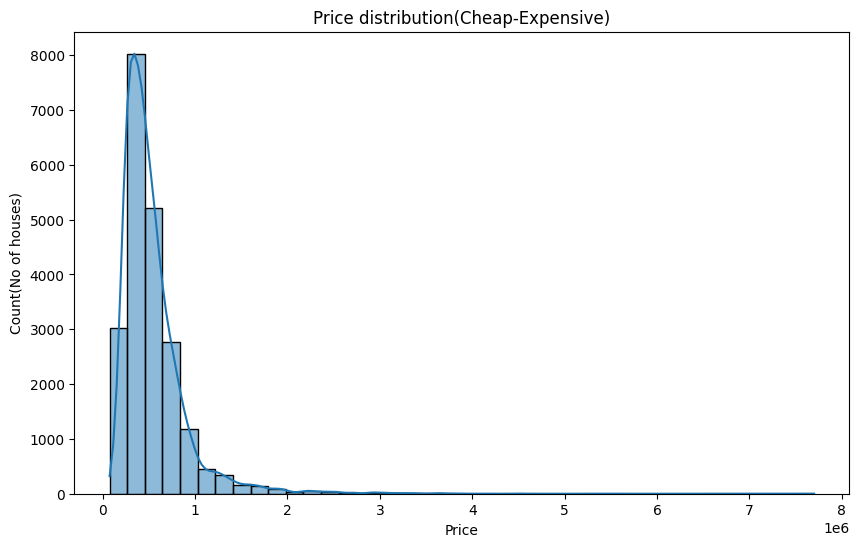

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(housing1['price'], kde=True,bins=40)

plt.title('Price distribution(Cheap-Expensive)')
plt.xlabel('Price')
plt.ylabel('Count(No of houses)')

# Correlation heatmap
 - This shows the visual correlation of the different columns according to the target column(price) and it ranges between -1 & 1. (+1)- Strong positive relation and as X goes up price goes up. (-1) - Strong negative relation and as X goes up,price goes down.
 - The 1.0 values happen when a feature is compared to itself(perfect correlation).
 - Dark-red - shows the strong positive relations
 - Dark-blue - shows the strong negative relations
 - sqft_living,sqft_above correlates highly(positively) with the price with 0.88 compared to zipcode which relaates negatives with -0.56

<Axes: >

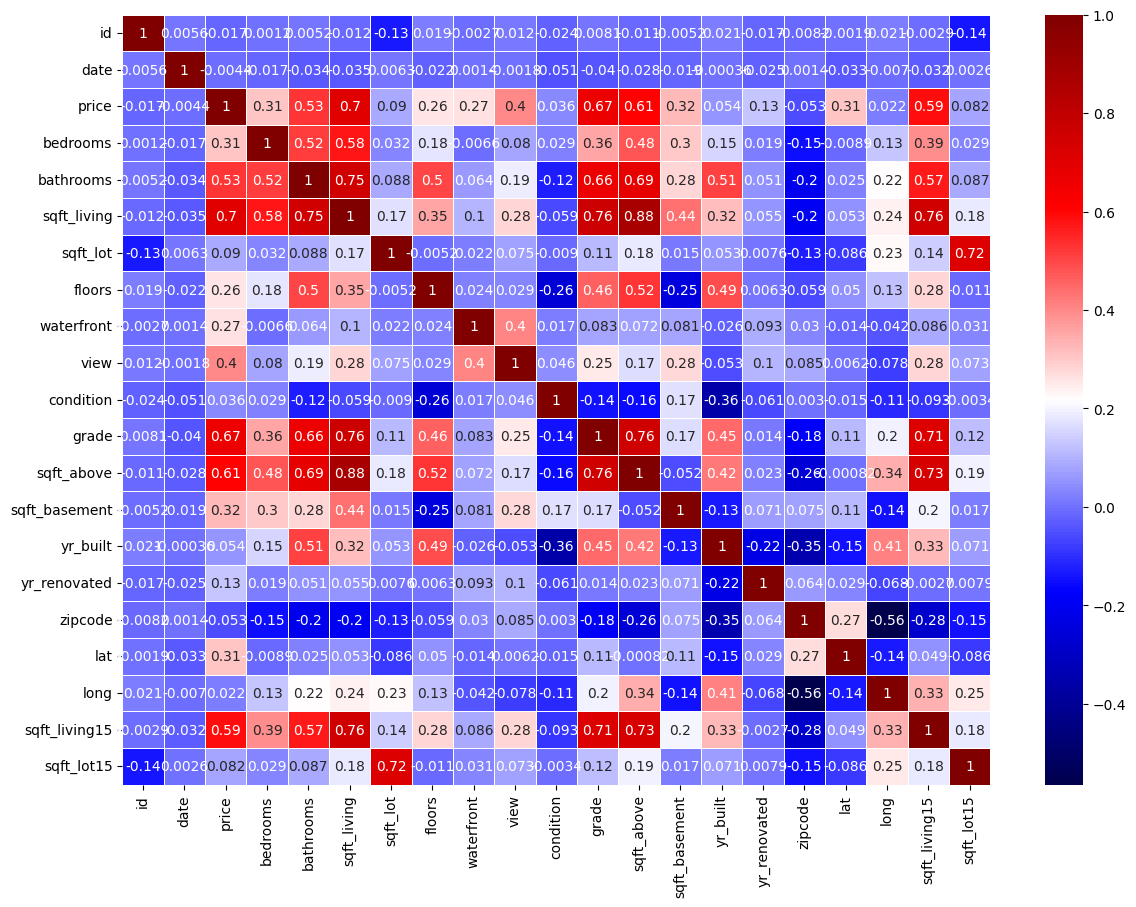

In [12]:
corr = housing1.corr(numeric_only= True)['price'].sort_values(ascending=False)
plt.figure(figsize=(14,10))
sns.heatmap(housing1.corr(),annot=True,linewidth=0.5,cmap='seismic')

# Price vs sqft_living(Scatter plot).
 - This shows the price distribution depending on the how big the house is.
 - Each dot on the graph represents one house.
 -The bigger the house size (moving right on the x-axis), the more expensive the house usually is (going up on the y-axis).

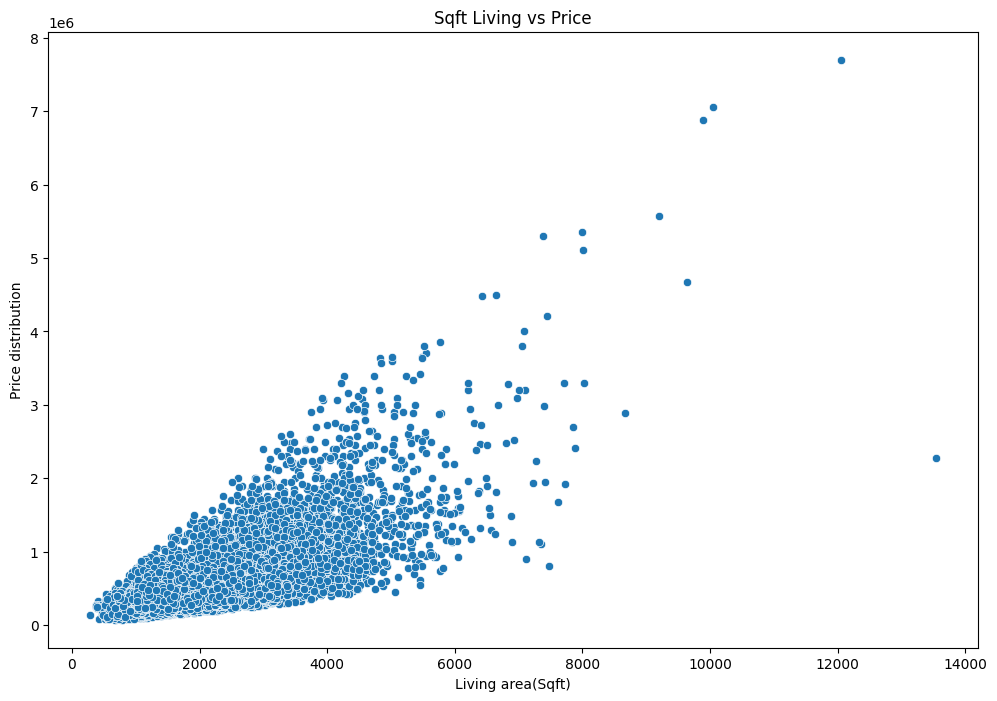

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=housing1,x='sqft_living',y='price')

plt.title('Sqft Living vs Price')
plt.xlabel('Living area(Sqft)')
plt.ylabel('Price distribution')
plt.show()

# Price vs No. of bedrooms
 - Shows the price change depending on the number of bedrooms per house
 - The marks above the boxplots are known as outliers and they show data points for houses that are way much above than most prices; eg; a 3 bedroom costing almost 3M is way above a normal 2 bdrm house hence appears as an outlier.
 
 - Line inside the box shows the median price.


Interpretation:
 - Most 8 bedroom houses are way pricier than 1,0 bedroom house.
 - From 0-7 bdrm houses, there are many that are above the normal price range; eg the 6 bdrm one at 7.8M

C:\Users\Admin\AppData\Local\Temp\ipykernel_7848\993303063.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


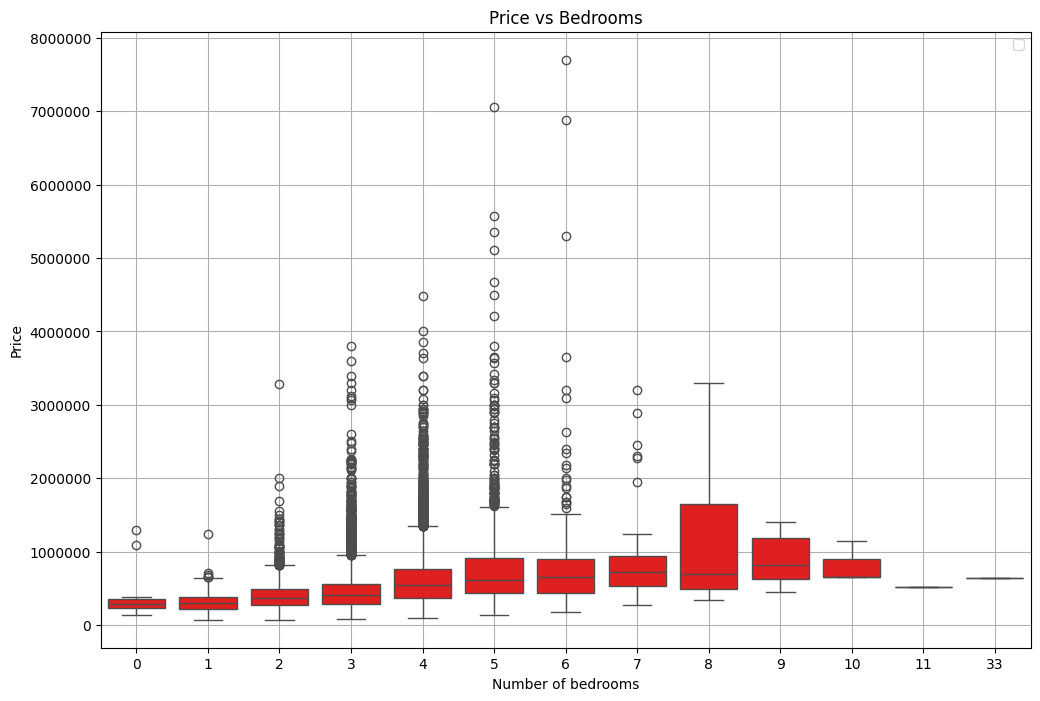

In [14]:
import matplotlib.ticker as ticker

plt.figure(figsize=(12,8))
sns.boxplot(data=housing1,x='bedrooms',y='price',color='Red')

plt.title('Price vs Bedrooms')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

# Price vs Grade
- Shows the price changes depending on the grade.
- The higher the grade = higher quality = higher price as seen on the graph below
- The lines in the middle show the median price for each of the grades.
- Houses in grade 13 are more expensive than those in other grades

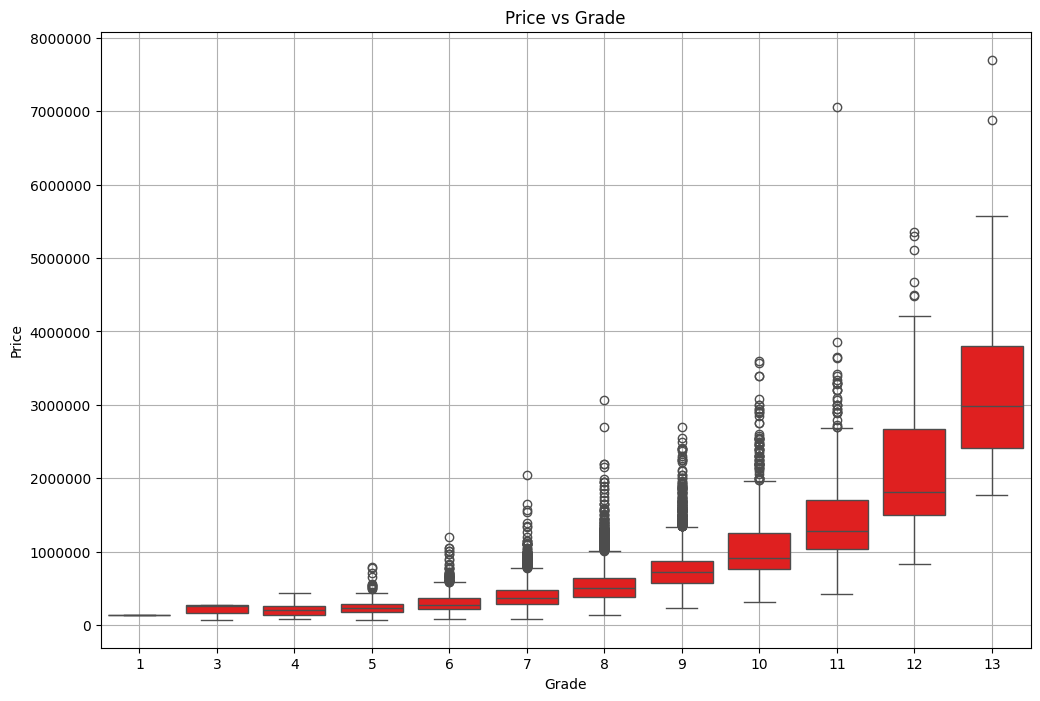

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(data=housing1,x='grade',y='price',color='Red')

plt.title('Price vs Grade')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Price vs Number of floors.
 - Shows how the price varies depending on the number of floors a house has.
 - House with 2.5 floors are more expensive at 10M plus, followed by thise with 3.5 floors and those with 1.0 floors are cheaper. There is a significant drop of houses with 3.0 floors.

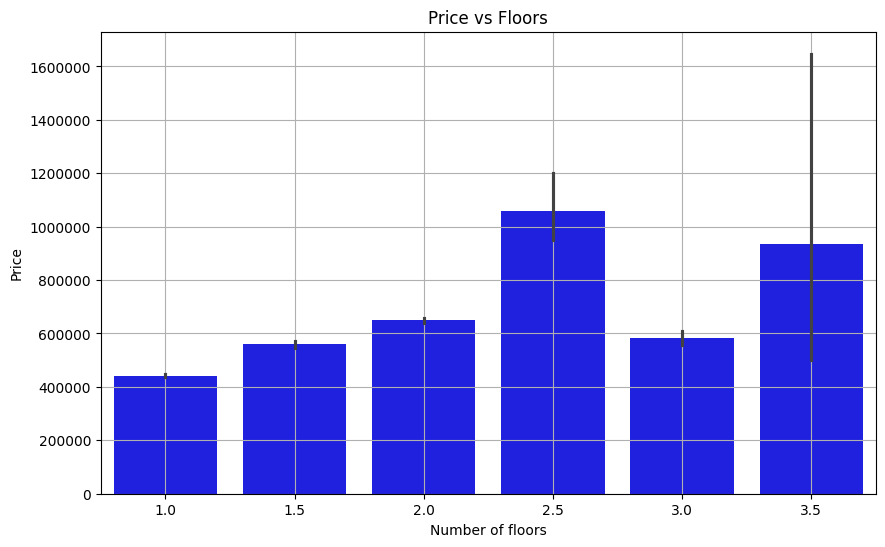

In [16]:
plt.figure(figsize=(10,6))

sns.barplot(data=housing1,x='floors',y='price',color='blue')

plt.title('Price vs Floors')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Number of floors')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Plot price against the view column
This shows the price range of the house depending with the ones with views and those without .
It is also dependent on the number of views available
 - The view rating is graded 0-4.
 - The houses with a view rating of 4(An excellent view) are more expensive than those with a rating of 0

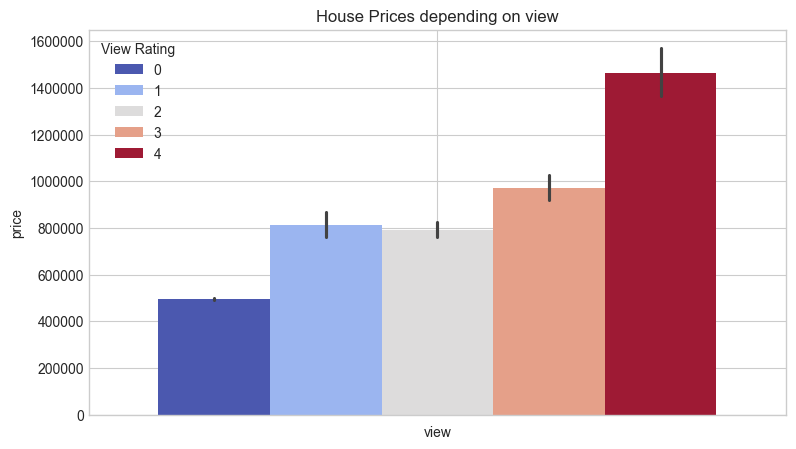

In [17]:
import matplotlib.ticker as ticker #makes values remain in originl formart

plt.figure(figsize=(9,5))
plt.style.use('seaborn-v0_8-whitegrid')


sns.barplot(data= housing1 ,hue='view',y='price',palette='coolwarm')
plt.title('House Prices depending on view',fontsize=12)
plt.xlabel('view')
plt.grid(True)
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('price')
plt.legend(title='View Rating')
plt.show()


# Plot price against waterfront
This shows if the price flactuates depending on the waterfront view available
 - Houses with a waterfront view are more expensive than those without a waterfront view

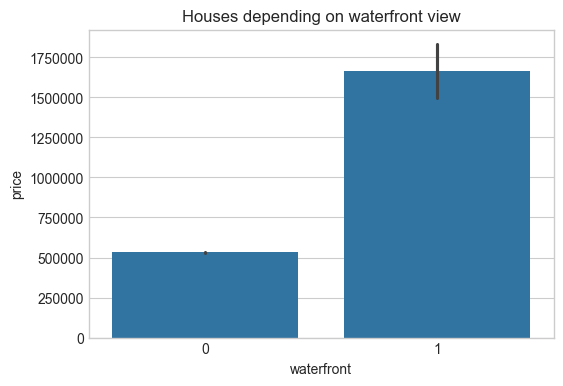

In [18]:
plt.figure(figsize=(6,4))
plt.style.use('seaborn-v0_8-whitegrid')

sns.barplot(data= housing1, x='waterfront', y='price')
plt.title('Houses depending on waterfront view',fontsize=12)
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('waterfront')
plt.ylabel('price')
plt.show()

#  Price trend against year built
This shows the pricing trend of housing depending on year
 - The price significantly dropped for houses built in 1940 and them steadily rose for the houses built afterwards

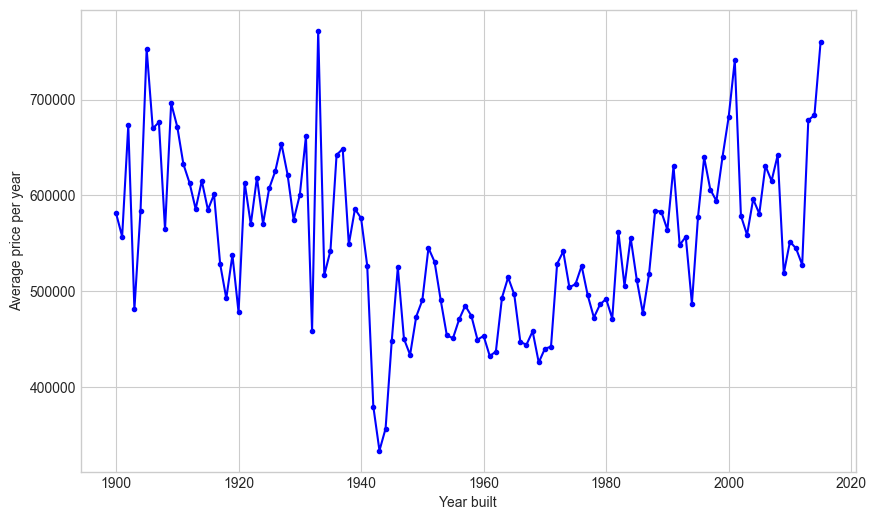

In [19]:
average_price= housing1.groupby('yr_built')['price'].mean()
x=average_price.index
y= average_price.values

plt.figure(figsize=(10,6))

plt.plot(x,y, linestyle='-',linewidth='1.5',color='blue',marker='.') #marker='o': adds dots at data points
plt.xlabel('Year built')
plt.ylabel('Average price per year')
plt.grid(True)
plt.show()

# Price trend against year renovated
 - Most houses renovated after year 2000 had an increase in price in the market in comparison to those that were never renovated.
 - pd.cut() Divides a continuous numeric column into categories (bins or groups)

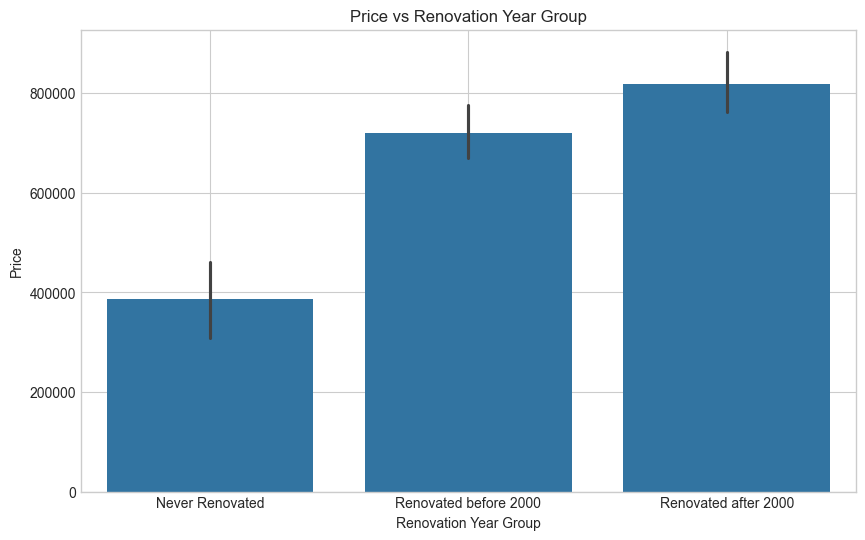

In [20]:
housing2 = housing1.copy()
housing2['renovated_group'] = pd.cut(housing2['yr_renovated'],
                                     bins=[0, 1950, 2000, 2025],
                                     labels=['Never Renovated','Renovated before 2000','Renovated after 2000'])

plt.figure(figsize=(10,6))
sns.barplot(x='renovated_group', y='price', data=housing2)
plt.title('Price vs Renovation Year Group')
plt.xlabel('Renovation Year Group')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [21]:

housing1.drop(columns=['date'],inplace=True)
print(housing1.dtypes)

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


#  Fitting into a model(Linear Regression)
 -Draws the best straight line through the data(housing1) to predict the value(price) based on features (bedrooms,floors,sqft etc)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score #Measures errors and performance
from sklearn.preprocessing import StandardScaler

# Select the x and y features
x = housing1.drop('price',axis=1)
y= housing1['price']

# Split into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=40)

#Standard scale
a= StandardScaler()
x_train_a = a.fit_transform(x_train)
x_test_a = a.transform(x_test)


# Fit into a model
model = LinearRegression()
xy_train= model.fit(x_train_a,y_train)

y_pred = model.predict(x_test_a)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error (RMSE):", rmse)




Mean Squared Error: 38013414596.56049
R-squared: 0.7043049637770633
Root Mean Squared Error (RMSE): 194970.29157428187


<Axes: xlabel='sqft_living', ylabel='price'>

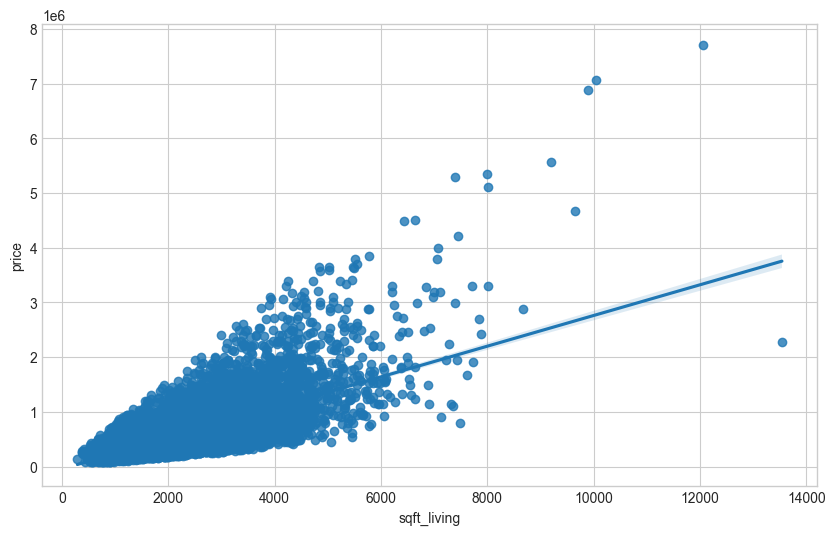

In [23]:
plt.figure(figsize=(10,6))
sns.regplot(x='sqft_living', y='price', data=housing1)

# Random forest model

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Features and Target
x = housing1.drop(['price'], axis=1)
y = housing1['price']

# Step 2: Train/Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

# Step 3: Optional scaling (Random Forest doesn’t need it, but won’t hurt)
b = StandardScaler()
x_train_b = b.fit_transform(x_train)
x_test_b = b.transform(x_test)

# Step 4: Fit Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=1000, random_state=40)
rf_model.fit(x_train_b, y_train)

# Step 5: Predict and Evaluate
y_pred = rf_model.predict(x_test_b)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor:")
print("RMSE:", rmse)
print("R² Score:", r2)

Random Forest Regressor:
RMSE: 121406.8861181187
R² Score: 0.8853447904248565


# SVM model

In [25]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')  
svr.fit(x_train_b, y_train)

# Predict and evaluate
y_pred = svr.predict(x_test_b)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("SVR Regression Results:")
print("RMSE:", rmse)
print("R² Score:", r2)

SVR Regression Results:
RMSE: 369661.3998228591
R² Score: -0.0629561753239205
